# Data Analysis and Statistical Model Building for TESCO Stores Dataset

## Content

* 1. Import required libraries and Packages
* 2. Import all the Datasets (a. Training and Testing Datasets,   b. Masked Dataset)
* 3. Data Quality Check (Datatype, Missing Value, Unique values, Impuitation, Outlier Analysis)
* 4. Feature Analysis (Univariate, Bivariate)
* 5. Correlation
* 6. Categorical Encoding
* 7. Feature Selection
* 8. Model Dataset Preparation
* 9. Model Build (Using RandomForest Regressor)
* 10. Hyperparameter Tuning and Choose the Best Model
* 11. Performance Comparison
* 12. Feature Importance
* 13. Masked Dataset Model Building
* 14. Questions to STORE Team, Answers for the 3 Questions
* 15. Final Recommendation for TESCO STORE Team


## 1. Library & Package

In [1]:
# Basic numerical and other libraries
import random
import numpy as np
import pandas as pd
from scipy import stats
import sys
import functools

# Display option
from IPython.display import display, HTML
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 5000

# Handle warnings (during execution of code)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Datetime
import time
from datetime import datetime
from datetime import timedelta

# Visulisation
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# statsmodel
import statsmodels.api as statsm
import statsmodels.discrete.discrete_model as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Save Model
import pickle
from sklearn.externals import joblib


## 2. Datasets

* import datasets

In [2]:
# Training Dataset
df_train = pd.read_csv('s3://tesco_datasets/train.csv')
print(df_train.shape)
df_train.head(3)


(320, 16)


,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
0,464,17.600541,0.0,18.10,no,NaN,2.926,29.0,2.9084,All transport options,666,20.2,368.74,4.5325,-0.399933,c_40
1,504,0.603556,20.0,3.97,no,14.85,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80
2,295,0.606810,0.0,6.20,no,7.70,2.981,31.9,3.6715,Many transport options,307,17.4,378.35,2.9125,0.166920,c_53


In [3]:
# Test Dataset
df_test = pd.read_csv('s3://tesco_datasets/test.csv')
print(df_test.shape)
df_test.head()

(13, 15)


,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,county
0,105,0.039968,34.0,6.09,no,4.15,3.590,59.6,5.4917,Many transport options,329,16.1,395.75,2.3750,c_42
1,400,0.587758,20.0,3.97,no,14.85,5.398,8.5,2.2885,Average transport options,264,13.0,386.86,1.4775,c_140
2,338,1.116926,0.0,8.14,no,9.40,2.813,0.0,4.0952,Few transport options,307,NaN,394.54,4.9700,c_55
3,227,1.517409,0.0,19.58,no,12.75,3.066,0.0,1.7573,Average transport options,403,14.7,353.89,1.6075,c_62
4,114,83.093533,0.0,18.10,no,16.45,2.957,0.0,1.8026,All transport options,666,20.2,16.45,5.1550,c_22


In [4]:
## Masked Dataset
df_masked_data = pd.read_csv('s3://tesco_datasets/masked_datasets/train.csv')
print(df_masked_data.shape)
df_masked_data.head(3)

(100, 3)


,x1,x2,y
0,0.784119,0.948352,1.437410
1,0.911072,0.787079,0.943558
2,0.549740,0.906819,1.197050


## 3. Data Quality Check

In [5]:
# Numeric summary
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
location_id,320.0,252.387500,145.600582,1.000000,126.500000,251.500000,377.250000,506.000000
crime_rate,320.0,3.596375,7.176342,0.007142,0.087937,0.289681,4.063553,51.693093
proportion_flats,320.0,10.673438,22.579232,0.000000,0.000000,0.000000,12.500000,100.000000
proportion_nonretail,320.0,11.307906,7.032693,0.740000,5.130000,9.900000,18.100000,27.740000
commercial_property,291.0,16.868557,73.806051,1.750000,5.450000,9.400000,14.050000,1009.000000
household_size,320.0,3.252803,0.695442,0.561000,2.879750,3.197500,3.597250,5.725000
proportion_newbuilds,320.0,31.849063,27.845777,0.000000,6.350000,23.400000,54.450000,94.000000
public_transport_dist,320.0,3.718765,1.984765,1.137000,2.138075,3.095750,5.116700,10.710300
property_value,320.0,408.834375,170.888974,188.000000,277.000000,330.000000,666.000000,711.000000
school_proximity,257.0,18.589494,2.075529,13.000000,17.400000,19.100000,20.200000,21.200000


In [6]:
# Data types
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
location_id               320 non-null int64
crime_rate                320 non-null float64
proportion_flats          320 non-null float64
proportion_nonretail      320 non-null float64
new_store                 320 non-null object
commercial_property       291 non-null float64
household_size            320 non-null float64
proportion_newbuilds      320 non-null float64
public_transport_dist     320 non-null float64
transport_availability    320 non-null object
property_value            320 non-null int64
school_proximity          257 non-null float64
competitor_density        320 non-null float64
household_affluency       320 non-null float64
normalised_sales          320 non-null float64
county                    320 non-null object
dtypes: float64(11), int64(2), object(3)
memory usage: 40.1+ KB
None


In [7]:
'''
It seems the below 3 features are categorical.
1. new_store
2. transport_availability
3. county
'''

'\nIt seems the below 3 features are categorical.\n1. new_store\n2. transport_availability\n3. county\n'

In [8]:
## Rechecking if the above finding is true

# Identify Categorical Features (below command will help in selecting columns having datatype 'object')
print(df_train.select_dtypes(['object']).columns)

Index(['new_store', 'transport_availability', 'county'], dtype='object')


### Missing Value Analysis

In [9]:
# Calculate missing value count and percentage

missing_value_df_train = pd.DataFrame(index = df_train.keys(),data =df_train.isnull().sum(),columns = ['Missing_Value_Count'])
missing_value_df_train['Missing_Value_Percentage'] = ((df_train.isnull().mean())*100)
missing_value_df_train.sort_values('Missing_Value_Count',ascending= False)

,Missing_Value_Count,Missing_Value_Percentage
school_proximity,63,19.6875
commercial_property,29,9.0625
location_id,0,0.0000
crime_rate,0,0.0000
proportion_flats,0,0.0000
proportion_nonretail,0,0.0000
new_store,0,0.0000
household_size,0,0.0000
proportion_newbuilds,0,0.0000
public_transport_dist,0,0.0000


In [10]:
# Below 2 features only are having missing values
'''
1. commercial_property
2. school_proximity
'''
# Both the features are having missing values less than 20%. We may impute these.

'\n1. commercial_property\n2. school_proximity\n'

In [11]:
# Number of unique values for each feature
df_train.nunique()

location_id               320
crime_rate                319
proportion_flats           25
proportion_nonretail       67
new_store                   2
commercial_property        76
household_size            298
proportion_newbuilds      252
public_transport_dist     286
transport_availability      5
property_value             58
school_proximity           40
competitor_density        226
household_affluency       298
normalised_sales          188
county                     98
dtype: int64

### Imputation

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([288.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([   1.75 ,  102.475,  203.2  ,  303.925,  404.65 ,  505.375,
         606.1  ,  706.825,  807.55 ,  908.275, 1009.   ]),
 <a list of 10 Patch objects>)

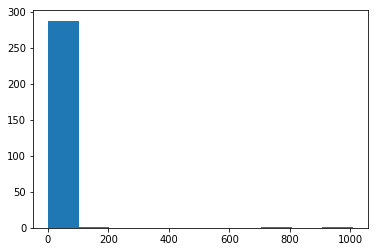

In [12]:
# Histogram
plt.hist(df_train['commercial_property'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 7.,  0., 25., 10., 16., 29., 33., 21., 87., 29.]),
 array([13.  , 13.82, 14.64, 15.46, 16.28, 17.1 , 17.92, 18.74, 19.56,
        20.38, 21.2 ]),
 <a list of 10 Patch objects>)

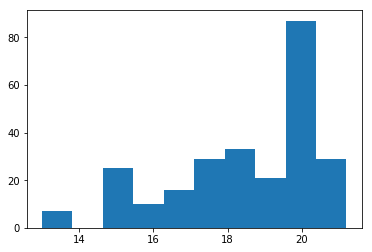

In [13]:
# Histogram
plt.hist(df_train['school_proximity'])

In [14]:
print(df_train['commercial_property'].mean())
print(df_train['school_proximity'].mean())

16.86855670103091
18.58949416342409


In [15]:
'''
After seeing the value distribution  and mean of each feature, it makes sense to impute with mean for respective feature.
'''

'\nAfter seeing the value distribution  and mean of each feature, it makes sense to impute with mean for respective feature.\n'

In [16]:
# Make a copy of raw training set before imputing it
df_train_impute = df_train.copy()

In [17]:
df_train_impute['commercial_property'] = df_train_impute['commercial_property'].fillna(df_train_impute['commercial_property'].mean())
df_train_impute['school_proximity'] = df_train_impute['school_proximity'].fillna(df_train_impute['school_proximity'].mean())


In [18]:
# Rechecking if there is any null values still present
df_train_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
location_id               320 non-null int64
crime_rate                320 non-null float64
proportion_flats          320 non-null float64
proportion_nonretail      320 non-null float64
new_store                 320 non-null object
commercial_property       320 non-null float64
household_size            320 non-null float64
proportion_newbuilds      320 non-null float64
public_transport_dist     320 non-null float64
transport_availability    320 non-null object
property_value            320 non-null int64
school_proximity          320 non-null float64
competitor_density        320 non-null float64
household_affluency       320 non-null float64
normalised_sales          320 non-null float64
county                    320 non-null object
dtypes: float64(11), int64(2), object(3)
memory usage: 40.1+ KB


##### Outlier Analysis for Categorical Features

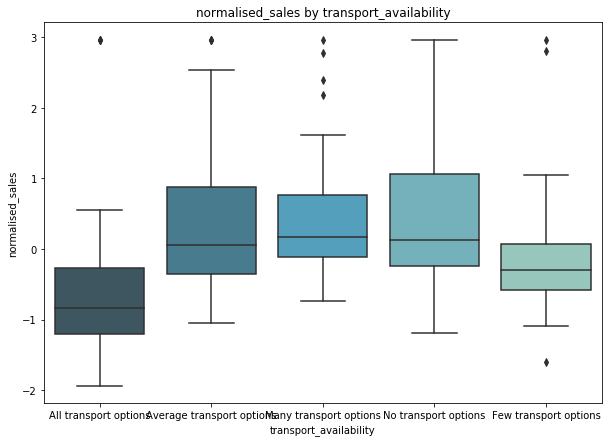

In [19]:
# normalised_sales by transport_availability
plt.figure(figsize = (10,7))
sns.boxplot(x = 'transport_availability', y = 'normalised_sales', data = df_train, palette= 'GnBu_d').set_title('normalised_sales by transport_availability')
plt.show()

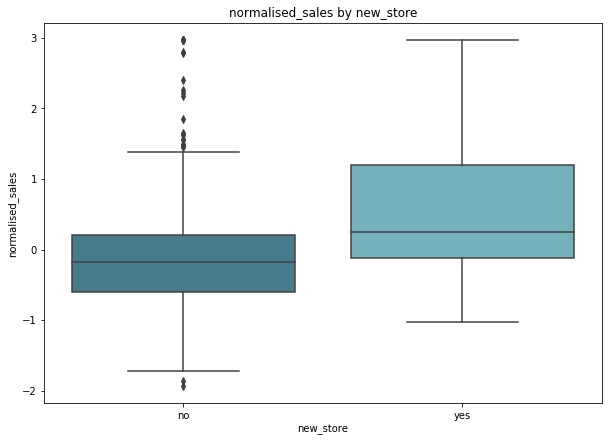

In [20]:
# normalised_sales by new_store
plt.figure(figsize = (10,7))
sns.boxplot(x = 'new_store', y = 'normalised_sales', data = df_train, palette= 'GnBu_d').set_title('normalised_sales by new_store')
plt.show()

## 4. Feature Analysis

In [21]:
df_train.head(2)

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
0,464,17.600541,0.0,18.10,no,NaN,2.926,29.0,2.9084,All transport options,666,20.2,368.74,4.5325,-0.399933,c_40
1,504,0.603556,20.0,3.97,no,14.85,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80


#### location_id

In [22]:
print(df_train.shape[0])
df_train['location_id'].nunique()

320


320

In [23]:
'''
There is no duplicate location_id
'''

'\nThere is no duplicate location_id\n'

#### county

In [24]:
# unique county
df_train['county'].nunique()

98

In [25]:
'''
categorical feature
Multiple counties present
Sum of normalised_sales by grouping by the counties
'''

'\ncategorical feature\nMultiple counties present\nSum of normalised_sales by grouping by the counties\n'

#### crime_rate

In [26]:
# Range of crime_rate
print(df_train['crime_rate'].min())
print(df_train['crime_rate'].max())

0.0071416
51.69309299999999


(array([250.,  30.,  19.,   9.,   4.,   4.,   1.,   0.,   2.,   1.]),
 array([7.14160000e-03, 5.17573674e+00, 1.03443319e+01, 1.55129270e+01,
        2.06815222e+01, 2.58501173e+01, 3.10187124e+01, 3.61873076e+01,
        4.13559027e+01, 4.65244979e+01, 5.16930930e+01]),
 <a list of 10 Patch objects>)

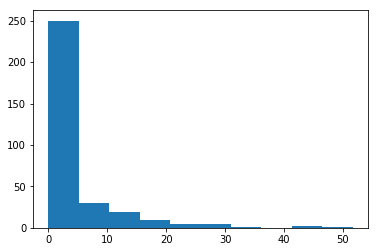

In [27]:
# Histogram
plt.hist(df_train['crime_rate'])

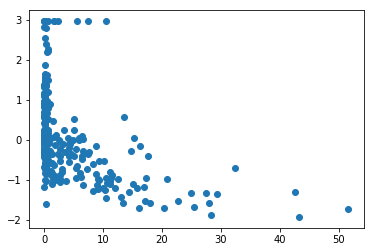

In [28]:
# Scatter plot for crime_rate vs normalised_sales
plt.scatter(df_train['crime_rate'], df_train['normalised_sales'])

(array([2., 6., 3., 5., 3., 0., 1., 1., 0., 2.]),
 array([-1.93697397, -1.73966582, -1.54235767, -1.34504952, -1.14774137,
        -0.95043322, -0.75312507, -0.55581692, -0.35850877, -0.16120062,
         0.03610753]),
 <a list of 10 Patch objects>)

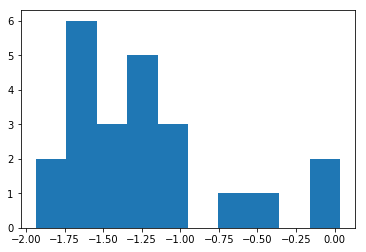

In [29]:
# crime_rate_gt_10 = df_train[df_train['crime_rate']>=10]
plt.hist(df_train[df_train['crime_rate']>15]['normalised_sales'])

In [30]:
df_train[(df_train['crime_rate']>15)&(df_train['normalised_sales']>=0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
151,434,15.280086,0.0,18.1,no,14.05,0.863,0.0,1.5106,All transport options,666,NaN,131.42,3.3325,0.036108,c_72


In [31]:
'''
high crime_rate results in less sales
only 1 store having positive sales figure having crime_rate > 15. Sales is also less than the median of normalised sales i.e. 0.5.
'''

'\nhigh crime_rate results in less sales\nonly 1 store having positive sales figure having crime_rate > 15. Sales is also less than the median of normalised sales i.e. 0.5.\n'

#### proportion_flats

In [32]:
# Range of proportion_flats
print(df_train['proportion_flats'].min())
print(df_train['proportion_flats'].max())

0.0
100.0


(array([238.,   8.,  32.,   9.,   7.,   4.,   3.,   3.,  10.,   6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

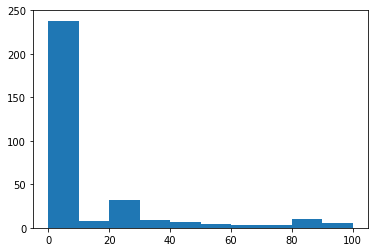

In [33]:
# Histogram
plt.hist(df_train['proportion_flats'])

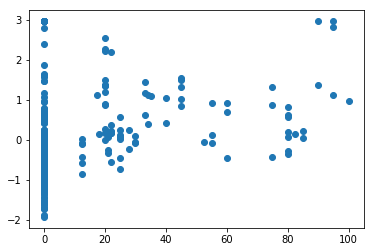

In [34]:
# Scatter plot for proportion_flats vs normalised_sales
plt.scatter(df_train['proportion_flats'], df_train['normalised_sales'])

In [35]:
'''
Can't infer much from proportion_flats
'''

"\nCan't infer much from proportion_flats\n"

#### proportion_nonretail

In [36]:
# Range of proportion_nonretail
print(df_train['proportion_nonretail'].min())
print(df_train['proportion_nonretail'].max())

0.74
27.74


(array([ 49.,  56.,  50.,  27.,  12.,   2., 104.,  10.,   0.,  10.]),
 array([ 0.74,  3.44,  6.14,  8.84, 11.54, 14.24, 16.94, 19.64, 22.34,
        25.04, 27.74]),
 <a list of 10 Patch objects>)

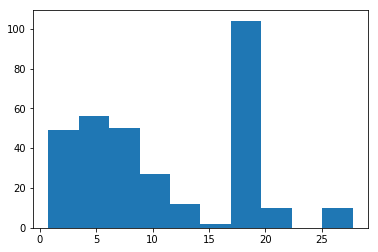

In [37]:
# Histogram
plt.hist(df_train['proportion_nonretail'])

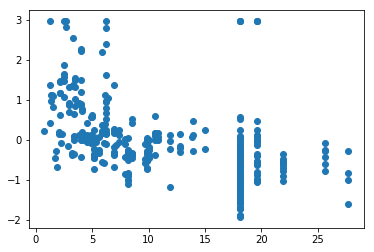

In [38]:
# Scatter plot for proportion_nonretail vs normalised_sales
plt.scatter(df_train['proportion_nonretail'], df_train['normalised_sales'])

(array([1., 0., 0., 2., 1., 4., 4., 3., 4., 1.]),
 array([-1.59904288, -1.44751895, -1.29599501, -1.14447107, -0.99294713,
        -0.84142319, -0.68989926, -0.53837532, -0.38685138, -0.23532744,
        -0.0838035 ]),
 <a list of 10 Patch objects>)

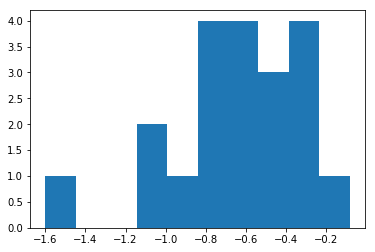

In [39]:
# proportion_nonretail_gt_20 = df_train[df_train['proportion_nonretail']>=20]
plt.hist(df_train[df_train['proportion_nonretail']>20]['normalised_sales'])

In [40]:
df_train[(df_train['proportion_nonretail']>20)&(df_train['normalised_sales']>=0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county


In [41]:
'''
High proportion_nonretail results in low sales
proportion_nonretail >20 -> sales in negative
'''

'\nHigh proportion_nonretail results in low sales\nproportion_nonretail >20 -> sales in negative\n'

#### commercial_property

In [42]:
# Range of commercial_property
print(df_train['commercial_property'].min())
print(df_train['commercial_property'].max())

1.7500000000000016
1009.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([288.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([   1.75 ,  102.475,  203.2  ,  303.925,  404.65 ,  505.375,
         606.1  ,  706.825,  807.55 ,  908.275, 1009.   ]),
 <a list of 10 Patch objects>)

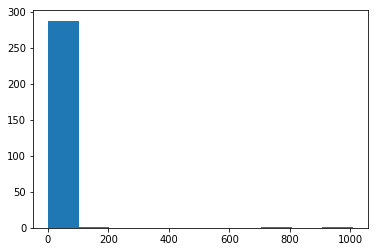

In [43]:
# Histogram
plt.hist(df_train['commercial_property'])

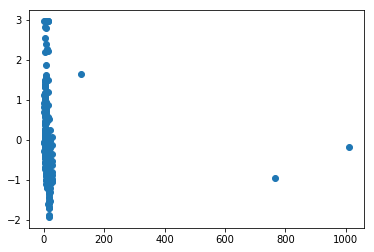

In [44]:
# Scatter plot for commercial_property vs normalised_sales
plt.scatter(df_train['commercial_property'], df_train['normalised_sales'])

In [45]:
'''
Can't infer much from commercial_property
'''

"\nCan't infer much from commercial_property\n"

#### household_size

In [46]:
# Range of household_size
print(df_train['household_size'].min())
print(df_train['household_size'].max())

0.5610000000000004
5.725


(array([  2.,   3.,  10.,  29., 103., 104.,  42.,  15.,   7.,   5.]),
 array([0.561 , 1.0774, 1.5938, 2.1102, 2.6266, 3.143 , 3.6594, 4.1758,
        4.6922, 5.2086, 5.725 ]),
 <a list of 10 Patch objects>)

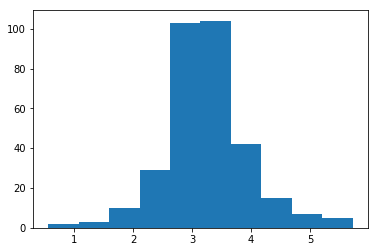

In [47]:
# Histogram
plt.hist(df_train['household_size'])

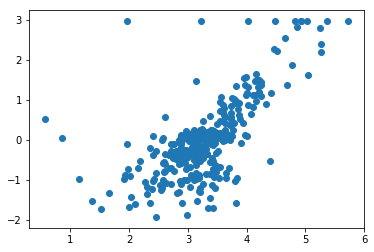

In [48]:
# Scatter plot for household_size vs normalised_sales
plt.scatter(df_train['household_size'], df_train['normalised_sales'])

(array([ 1.,  1.,  0.,  2.,  8.,  8.,  3.,  3.,  2., 10.]),
 array([-0.54164562, -0.19063333,  0.16037896,  0.51139124,  0.86240353,
         1.21341582,  1.56442811,  1.9154404 ,  2.26645268,  2.61746497,
         2.96847726]),
 <a list of 10 Patch objects>)

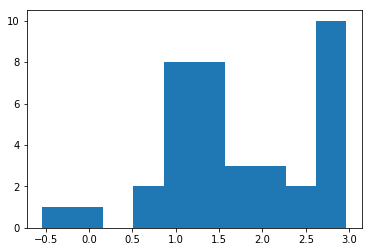

In [49]:
# household_size >= 4
plt.hist(df_train[df_train['household_size']>=4]['normalised_sales'])

In [50]:
df_train[(df_train['household_size']>=4)&(df_train['normalised_sales']<0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
212,328,9.320342,0.0,18.1,no,18.15,4.393,0.7,2.4527,All transport options,666,20.2,375.87,4.185,-0.541646,c_60


In [51]:
'''
More household_size results in more sales
household_size >=4 -> sales in positive
'''

'\nMore household_size results in more sales\nhousehold_size >=4 -> sales in positive\n'

#### proportion_newbuilds

In [52]:
# Range of proportion_newbuilds
print(df_train['proportion_newbuilds'].min())
print(df_train['proportion_newbuilds'].max())

0.0
94.0


(array([102.,  42.,  29.,  24.,  23.,  24.,  22.,  24.,  18.,  12.]),
 array([ 0. ,  9.4, 18.8, 28.2, 37.6, 47. , 56.4, 65.8, 75.2, 84.6, 94. ]),
 <a list of 10 Patch objects>)

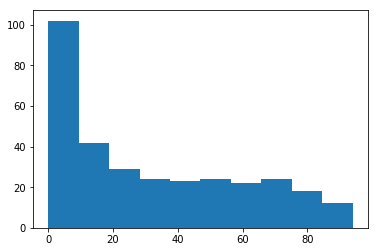

In [53]:
# Histogram
plt.hist(df_train['proportion_newbuilds'])

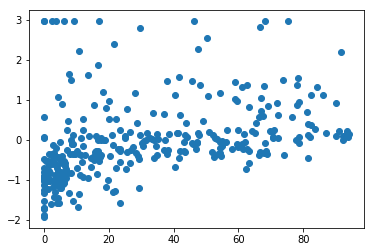

In [54]:
# Scatter plot for proportion_newbuilds vs normalised_sales
plt.scatter(df_train['proportion_newbuilds'], df_train['normalised_sales'])

(array([ 2., 18.,  5.,  4.,  4.,  4.,  0.,  1.,  0.,  1.]),
 array([-0.4544376 , -0.11214611,  0.23014537,  0.57243686,  0.91472835,
         1.25701983,  1.59931132,  1.9416028 ,  2.28389429,  2.62618577,
         2.96847726]),
 <a list of 10 Patch objects>)

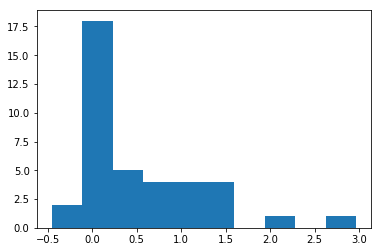

In [55]:
# proportion_newbuilds >= 70
plt.hist(df_train[df_train['proportion_newbuilds']>=70]['normalised_sales'])

In [56]:
df_train[(df_train['proportion_newbuilds']>=70)&(df_train['normalised_sales']<0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
130,356,0.081857,60.0,1.69,no,3.05,2.884,81.5,10.7103,Few transport options,411,18.3,392.33,1.9475,-0.454438,c_57
134,231,0.074772,0.0,3.24,no,NaN,2.868,74.2,5.2146,Few transport options,430,NaN,382.44,2.4925,-0.378131,c_61
274,309,0.065416,12.5,6.07,no,2.95,2.878,78.6,6.4980,Few transport options,345,NaN,396.21,2.0250,-0.083804,c_43
310,289,0.154155,0.0,10.59,no,6.95,2.891,77.7,3.9454,Few transport options,277,18.6,396.90,2.7175,-0.018397,c_46


In [57]:
'''
More proportion_newbuilds results in more sales
proportion_newbuilds >=70 -> sales in positive
'''

'\nMore proportion_newbuilds results in more sales\nproportion_newbuilds >=70 -> sales in positive\n'

#### public_transport_dist

In [58]:
# Range of public_transport_dist
print(df_train['public_transport_dist'].min())
print(df_train['public_transport_dist'].max())

1.137
10.7103


(array([74., 84., 46., 32., 31., 26., 14.,  8.,  4.,  1.]),
 array([ 1.137  ,  2.09433,  3.05166,  4.00899,  4.96632,  5.92365,
         6.88098,  7.83831,  8.79564,  9.75297, 10.7103 ]),
 <a list of 10 Patch objects>)

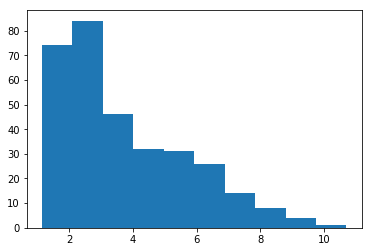

In [59]:
# Histogram
plt.hist(df_train['public_transport_dist'])

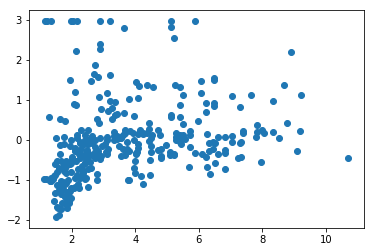

In [60]:
# Scatter plot for public_transport_dist vs normalised_sales
plt.scatter(df_train['public_transport_dist'], df_train['normalised_sales'])

(array([12., 24., 16.,  5.,  3.,  2.,  0.,  1.,  0.,  4.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

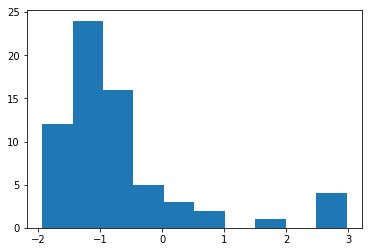

In [61]:
# public_transport_dist <2
plt.hist(df_train[df_train['public_transport_dist']<2]['normalised_sales'])

In [62]:
print(df_train[(df_train['public_transport_dist']<2)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['public_transport_dist']<2)&(df_train['normalised_sales']<0)].shape[0])

11
56


In [63]:
'''
Majority of low sales are due to poor index of public_transport_dist
public_transport_dist <2 -> sales in negative
'''

'\nMajority of low sales are due to poor index of public_transport_dist\npublic_transport_dist <2 -> sales in negative\n'

#### property_value

In [64]:
# Range of property_value
print(df_train['property_value'].min())
print(df_train['property_value'].max())

188
711


(array([40., 57., 68., 16., 50.,  1.,  0.,  0.,  0., 88.]),
 array([188. , 240.3, 292.6, 344.9, 397.2, 449.5, 501.8, 554.1, 606.4,
        658.7, 711. ]),
 <a list of 10 Patch objects>)

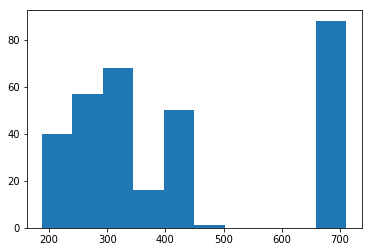

In [65]:
# Histogram
plt.hist(df_train['property_value'])

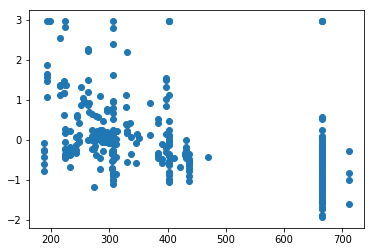

In [66]:
# Scatter plot for property_value vs normalised_sales
plt.scatter(df_train['property_value'], df_train['normalised_sales'])

(array([12., 26., 18., 22.,  5.,  2.,  0.,  0.,  0.,  3.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

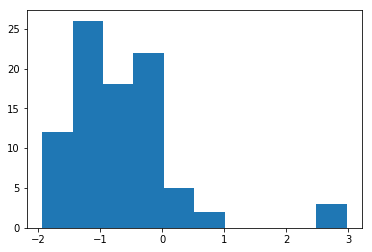

In [67]:
# property_value >500
plt.hist(df_train[df_train['property_value']>600]['normalised_sales'])

In [68]:
print(df_train[(df_train['property_value']>650)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['property_value']>650)&(df_train['normalised_sales']<0)].shape[0])

11
77


In [69]:
'''
Higher property_value results in low sales
property_value >650 -> sales in negative
'''

'\nHigher property_value results in low sales\nproperty_value >650 -> sales in negative\n'

#### school_proximity

In [70]:
# Range of school_proximity
print(df_train['school_proximity'].min())
print(df_train['school_proximity'].max())

13.0
21.2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 7.,  0., 25., 10., 16., 29., 33., 21., 87., 29.]),
 array([13.  , 13.82, 14.64, 15.46, 16.28, 17.1 , 17.92, 18.74, 19.56,
        20.38, 21.2 ]),
 <a list of 10 Patch objects>)

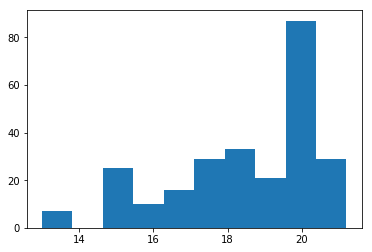

In [71]:
# Histogram
plt.hist(df_train['school_proximity'])

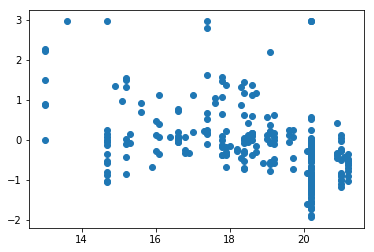

In [72]:
# Scatter plot for school_proximity vs normalised_sales
plt.scatter(df_train['school_proximity'], df_train['normalised_sales'])

(array([12., 24., 16.,  5.,  3.,  2.,  0.,  1.,  0.,  4.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

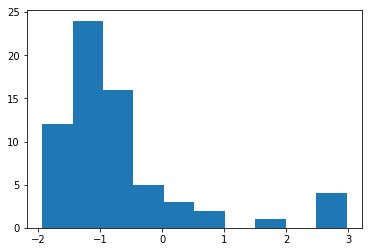

In [73]:
# public_transport_dist <2
plt.hist(df_train[df_train['public_transport_dist']<2]['normalised_sales'])

In [74]:
print(df_train[(df_train['school_proximity']<14)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['school_proximity']<14)&(df_train['normalised_sales']<0)].shape[0])

7
0


In [75]:
df_train[(df_train['school_proximity']<14)&(df_train['normalised_sales']>0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
1,504,0.603556,20.0,3.97,no,14.85,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80
167,156,0.610765,20.0,3.97,no,11.25,4.470,47.4,2.8720,Average transport options,264,13.0,390.30,0.7900,2.259912,c_80
206,204,0.932544,20.0,3.97,no,NaN,4.327,5.5,2.0788,Average transport options,264,13.0,393.42,2.8125,0.897287,c_71
264,263,0.887841,20.0,3.97,no,14.85,4.014,15.4,2.1329,Average transport options,264,13.0,384.07,3.6975,0.864584,c_63
303,96,0.016961,90.0,1.21,yes,2.55,4.923,75.2,5.8850,No transport options,198,13.6,395.52,0.7900,2.968477,c_128
304,449,0.860631,20.0,3.97,no,14.85,2.560,37.2,1.9865,Average transport options,264,13.0,392.40,2.6125,0.003405,c_58
316,24,0.621579,20.0,3.97,no,14.85,4.206,8.4,1.9301,Average transport options,264,13.0,387.89,2.0250,1.496842,c_99


In [76]:
'''
All the low school_proximity having better sales  (Do not recommend strongly, need in-depth analysis with more granular data)
school_proximity <14 -> sales in positive
'''

'\nAll the low school_proximity having better sales  (Do not recommend strongly, need in-depth analysis with more granular data)\nschool_proximity <14 -> sales in positive\n'

#### competitor_density

In [77]:
# Range of competitor_density
print(df_train['competitor_density'].min())
print(df_train['competitor_density'].max())

3.5
396.9


(array([  7.,   6.,   6.,   2.,   1.,   2.,   7.,   6.,  19., 264.]),
 array([  3.5 ,  42.84,  82.18, 121.52, 160.86, 200.2 , 239.54, 278.88,
        318.22, 357.56, 396.9 ]),
 <a list of 10 Patch objects>)

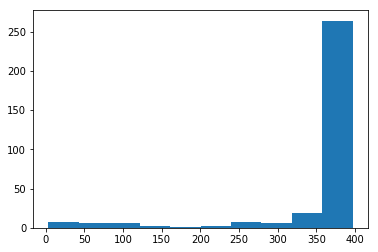

In [78]:
# Histogram
plt.hist(df_train['competitor_density'])

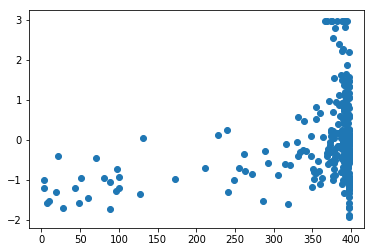

In [79]:
# Scatter plot for competitor_density vs normalised_sales
plt.scatter(df_train['competitor_density'], df_train['normalised_sales'])

In [80]:
print(df_train[(df_train['competitor_density']<350)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['competitor_density']<350)&(df_train['normalised_sales']<0)].shape[0])

6
43


In [81]:
'''
Low competitor_density results in less sales (This feature might not hold true, need multiple feature analysis.)
competitor_density <350 -> sales in negative
'''

'\nLow competitor_density results in less sales (This feature might not hold true, need multiple feature analysis.)\ncompetitor_density <350 -> sales in negative\n'

#### household_affluency

In [82]:
# Range of household_affluency
print(df_train['household_affluency'].min())
print(df_train['household_affluency'].max())

0.4325
9.4925


(array([45., 69., 68., 56., 35., 17., 15., 10.,  1.,  4.]),
 array([0.4325, 1.3385, 2.2445, 3.1505, 4.0565, 4.9625, 5.8685, 6.7745,
        7.6805, 8.5865, 9.4925]),
 <a list of 10 Patch objects>)

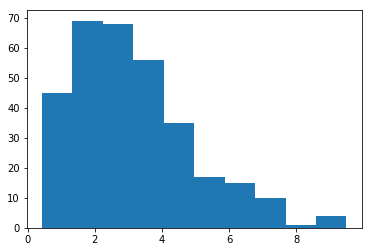

In [83]:
# Histogram
plt.hist(df_train['household_affluency'])

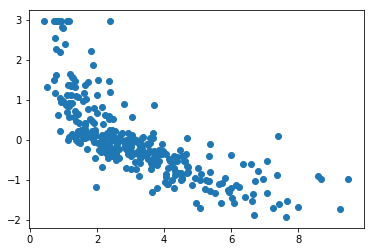

In [84]:
# Scatter plot for household_affluency vs normalised_sales
plt.scatter(df_train['household_affluency'], df_train['normalised_sales'])

(array([ 6.,  8., 17., 28., 27., 36., 16.,  8.,  1.,  1.]),
 array([-1.93697397, -1.6568182 , -1.37666243, -1.09650666, -0.81635089,
        -0.53619512, -0.25603935,  0.02411642,  0.30427219,  0.58442796,
         0.86458373]),
 <a list of 10 Patch objects>)

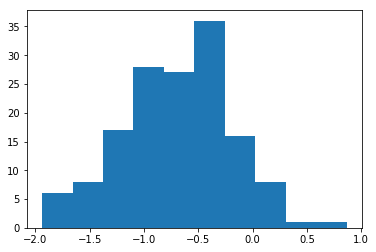

In [85]:
# household_affluency >=3
plt.hist(df_train[df_train['household_affluency']>=3]['normalised_sales'])

In [86]:
print(df_train[(df_train['household_affluency']>=3)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['household_affluency']>=3)&(df_train['normalised_sales']<0)].shape[0])

11
137


In [87]:
'''
Higher household_affluency results in lower sales and vice-versa
Linear relationship between household_affluency and normalised_sales (scatter plot)
household_affluency >=3 -> sales in negative
'''

'\nHigher household_affluency results in lower sales and vice-versa\nLinear relationship between household_affluency and normalised_sales (scatter plot)\nhousehold_affluency >=3 -> sales in negative\n'

#### normalised_sales

In [88]:
print(df_train['normalised_sales'].min())
print(df_train['normalised_sales'].max())

-1.9369739683900924
2.9684772596520763


(array([12., 34., 49., 99., 58., 25., 20.,  6.,  4., 13.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

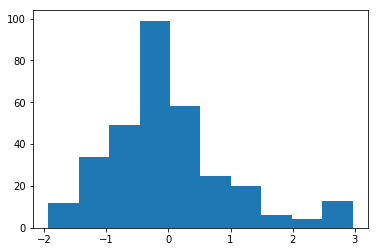

In [89]:
# Histogram
plt.hist(df_train['normalised_sales'])

In [90]:
'''
Sales in many of the locations are lower compared to the overall normalised sales 
(Assumption: While normalising the sales, high sales are in positive side and low sales are around 0 and less than 0)
'''

'\nSales in many of the locations are lower compared to the overall normalised sales \n(Assumption: While normalising the sales, high sales are in positive side and low sales are around 0 and less than 0)\n'

In [91]:
### Categorical Features

#### transport_availability

In [92]:
df_train['transport_availability'].unique()

array(['All transport options', 'Average transport options',
       'Many transport options', 'No transport options',
       'Few transport options'], dtype=object)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

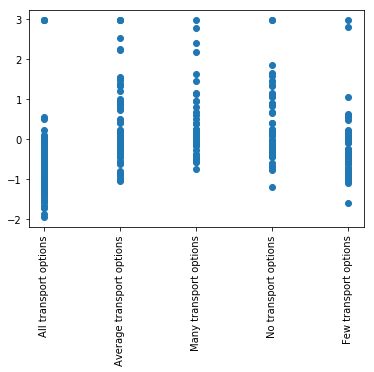

In [93]:
# Scatter plot for transport_availability vs normalised_sales
plt.scatter(df_train['transport_availability'], df_train['normalised_sales'])
plt.xticks(rotation=90)

In [94]:
print(df_train[(df_train['transport_availability']=='All transport options')&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['transport_availability']=='All transport options')&(df_train['normalised_sales']<0)].shape[0])

11
73


In [95]:
'''
Wherever all transport options are available, sales are comparatively less. This might be due to people are open to buy from range of other options in neighbourhood and also can travel far.
transport_availability == 'All transport options' -> less sales
'''

"\nWherever all transport options are available, sales are comparatively less. This might be due to people are open to buy from range of other options in neighbourhood and also can travel far.\ntransport_availability == 'All transport options' -> less sales\n"

#### new_store

In [96]:
df_train['new_store'].unique()

array(['no', 'yes'], dtype=object)

([0, 1], <a list of 2 Text xticklabel objects>)

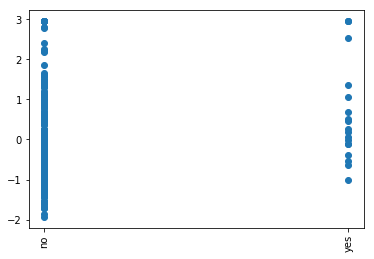

In [97]:
# Scatter plot for new_store vs normalised_sales
plt.scatter(df_train['new_store'], df_train['normalised_sales'])
plt.xticks(rotation=90)

In [98]:
'''
Can't infer much from new_store
'''

"\nCan't infer much from new_store\n"

## 5. Correlation

In [99]:
# Make correlation table
corr = df_train.corr()
corr

,location_id,crime_rate,proportion_flats,proportion_nonretail,commercial_property,household_size,proportion_newbuilds,public_transport_dist,property_value,school_proximity,competitor_density,household_affluency,normalised_sales
location_id,1.000000,0.058915,-0.017752,0.028544,-0.038307,-0.071631,0.003716,0.031125,0.026506,0.036079,0.042324,0.003529,0.040270
crime_rate,0.058915,1.000000,-0.231625,0.459096,0.050211,-0.352860,-0.409842,-0.433316,0.673836,0.338458,-0.435364,0.589311,-0.445005
proportion_flats,-0.017752,-0.231625,1.000000,-0.519235,-0.079379,0.330460,0.550014,0.637684,-0.310242,-0.384002,0.167767,-0.395258,0.355756
proportion_nonretail,0.028544,0.459096,-0.519235,1.000000,0.053313,-0.437013,-0.641404,-0.701577,0.703056,0.434502,-0.331806,0.618086,-0.485237
commercial_property,-0.038307,0.050211,-0.079379,0.053313,1.000000,-0.037224,-0.051047,-0.038078,0.048641,0.025346,0.004619,0.046985,-0.065091
household_size,-0.071631,-0.352860,0.330460,-0.437013,-0.037224,1.000000,0.260217,0.277205,-0.356574,-0.286888,0.151282,-0.618884,0.692506
proportion_newbuilds,0.003716,-0.409842,0.550014,-0.641404,-0.051047,0.260217,1.000000,0.760124,-0.508527,-0.305186,0.265851,-0.593322,0.380474
public_transport_dist,0.031125,-0.433316,0.637684,-0.701577,-0.038078,0.277205,0.760124,1.000000,-0.523460,-0.264519,0.281682,-0.511957,0.268658
property_value,0.026506,0.673836,-0.310242,0.703056,0.048641,-0.356574,-0.508527,-0.523460,1.000000,0.479334,-0.403320,0.542788,-0.463462
school_proximity,0.036079,0.338458,-0.384002,0.434502,0.025346,-0.286888,-0.305186,-0.264519,0.479334,1.000000,-0.194474,0.343887,-0.447789


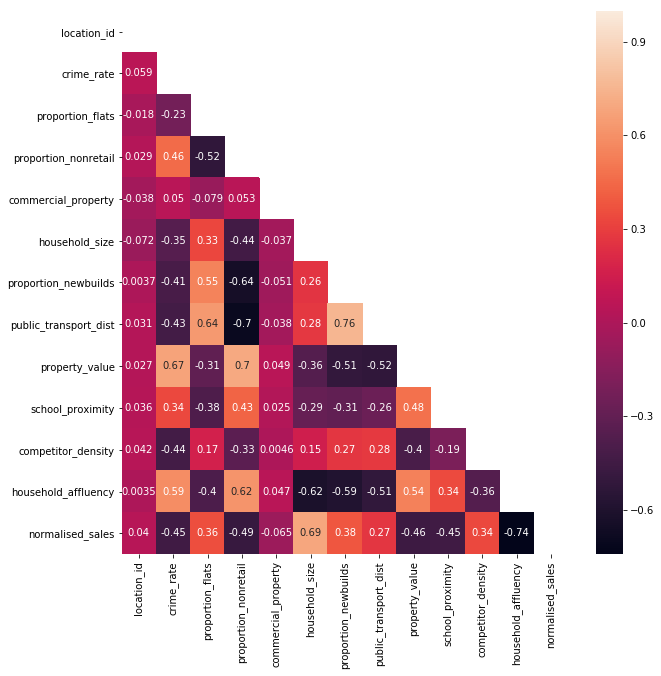

In [100]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Visualisation of heatmap matrix
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, mask=mask, annot = True)

## 6. Categorical Encoding

##### Below encoding methods can be applied.
1. Label Encoding
2. One-Hot Encoding
3. Custome Binary Encoding
4. Polynomial Encoder

For 'new_store', 'transport_availability' and 'county' features we can simply impute with *Label Enconding*.

In [101]:
# Copying the dataset before encoding the categorical features
df_train_cat_enc = df_train_impute.copy()

In [102]:
# Need to convert the datatypes of the features to 'category' before Label encoding.
df_train_cat_enc["new_store"] = df_train_cat_enc["new_store"].astype('category')
df_train_cat_enc["transport_availability"] = df_train_cat_enc["transport_availability"].astype('category')
df_train_cat_enc["county"] = df_train_cat_enc["county"].astype('category')

In [103]:
df_train_cat_enc["new_store_cat"] = df_train_cat_enc["new_store"].cat.codes
df_train_cat_enc["transport_availability_cat"] = df_train_cat_enc["transport_availability"].cat.codes
df_train_cat_enc["county_cat"] = df_train_cat_enc["county"].cat.codes

In [104]:
df_train_cat_enc.head(7)

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county,new_store_cat,transport_availability_cat,county_cat
0,464,17.600541,0.0,18.10,no,16.868557,2.926,29.0,2.9084,All transport options,666,20.2,368.74,4.5325,-0.399933,c_40,0,0,39
1,504,0.603556,20.0,3.97,no,14.850000,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80,0,1,80
2,295,0.606810,0.0,6.20,no,7.700000,2.981,31.9,3.6715,Many transport options,307,17.4,378.35,2.9125,0.166920,c_53,0,3,52
3,187,0.012385,55.0,2.25,no,1.950000,3.453,68.1,7.3073,No transport options,300,15.3,394.72,2.0575,-0.083804,c_65,0,4,64
4,193,0.016182,100.0,1.32,no,3.050000,3.816,59.5,8.3248,Average transport options,256,15.1,392.90,0.9875,0.962693,c_97,0,1,95
5,160,0.068659,0.0,11.93,no,11.150000,3.976,9.0,2.1675,No transport options,273,21.0,396.90,1.4100,0.123316,c_69,0,4,68
6,43,0.254126,12.5,7.87,no,8.700000,3.377,5.7,6.3467,Average transport options,311,15.2,392.52,5.1125,-0.846874,c_22,0,1,21


## 7. Feature Selection

In [105]:
feature_set = ['crime_rate',
'proportion_flats',
'proportion_nonretail',
'household_size',
'proportion_newbuilds',
'public_transport_dist',
'property_value',
'competitor_density',
'household_affluency',
'school_proximity',
'commercial_property',
'new_store_cat',
'transport_availability_cat',
'county_cat']


## 8. Model Dataset Preparation

In [106]:
train_data = df_train_cat_enc
exog = train_data[feature_set]
endog = train_data['normalised_sales']


In [107]:
# Insample train and validation split
x_train, x_test, y_train, y_test = train_test_split(exog, endog, test_size=0.2, random_state=42)


## 9. Model Build

In [108]:
# Need to use random forest regressor
rf = RandomForestRegressor(random_state = 42)

In [109]:
# Parameters used by the current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## 10. Hyperparameter Tuning and Choose the Best Model

In [110]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 15)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


#### Random Hyperparameter Grid

In [111]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


#### Random Search Training

In [112]:
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation
# Search across 100 different combinations, and by using all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   44.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

#### Best Hyperparameters

In [113]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': False}

#### Evaluate Random Search

In [114]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * abs(np.mean(errors / test_labels))
    accuracy = 100 - mape
    print('Model Performance:')
#     print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    print(mape)
    
    return accuracy


* Base Model

In [115]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance:
Accuracy = 93.03%
6.9740077280881945


* Random Model

In [116]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance:
Accuracy = 94.44%
5.555361843714943


## 11. Performance Comparison

* Improvement in Accuracy

In [117]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 1.52%.


#### Save the model as a pickle file

In [118]:
# save the model to disk
filename = 'tesco_dataset_model.pickle'
pickle.dump(best_random, open(filename, 'wb'))

## 12. Feature Importance

In [119]:
importances = best_random.feature_importances_
importances

array([0.05541703, 0.00756252, 0.05700888, 0.24340468, 0.02726652,
       0.0482159 , 0.04062147, 0.02313074, 0.23463765, 0.04430008,
       0.02954039, 0.00307885, 0.00971222, 0.17610306])

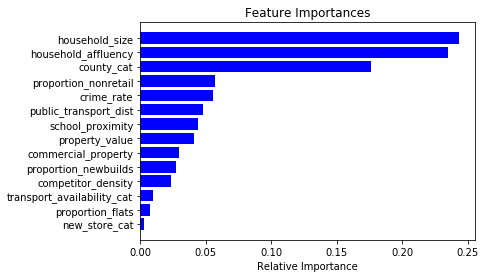

In [120]:
features = exog.columns
importances = best_random.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Comparison between correlation matrix and feature_importance from the Random Forest Model

In [121]:
# Make correlation table
corr_1 = train_data.corr()

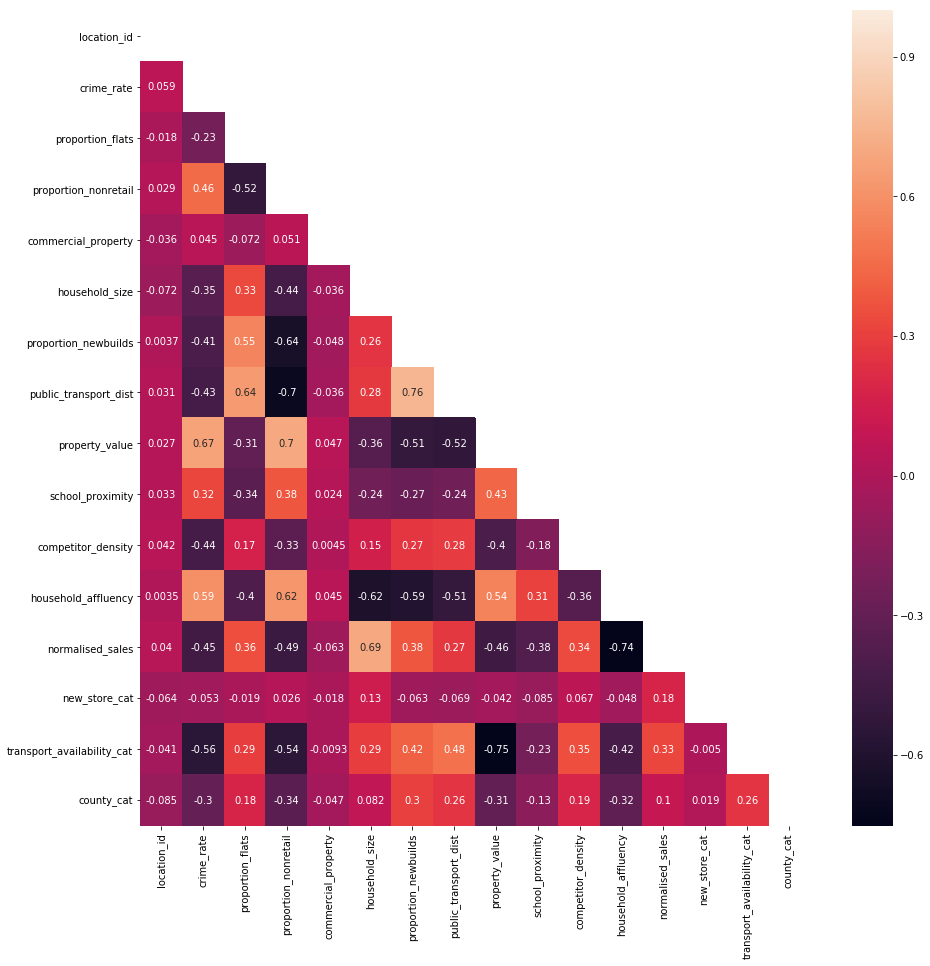

In [122]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_1, dtype=np.bool))

# Visualisation of heatmap matrix
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_1, mask=mask, annot = True)

###### Findings
1. household_affluency and household_size are the 2 most significant features in both the feature selection method
2. county: When correlation matrix doesn't hold that strong, this helps in splitting the tree when feeded into the model

* Below is a snapshot of how does the prediction, actual and error looks like ?

In [123]:
# Predictions for hold out 20% data out of training set
predictions_1 = pd.DataFrame(data=best_random.predict(x_test), columns=['y_pred'])
predictions_1['y_pred'].head(3)

0    1.799207
1   -0.412909
2   -0.308943
Name: y_pred, dtype: float64

In [124]:
# Define the actual values for normalised_sales
df_y_test = pd.DataFrame(data=y_test.values, columns=['y_act'])

In [125]:
# Type cast the predictions and actual values as a Dataframe
df_compare_pred_act = pd.DataFrame()
df_compare_pred_act['pred'] = predictions_1['y_pred']
df_compare_pred_act['act'] = df_y_test['y_act']

In [126]:
# Define Error
df_compare_pred_act['error'] = abs(df_compare_pred_act['pred']-df_compare_pred_act['act'])

In [127]:
# Snapshot for Predictions, Actual and Error
df_compare_pred_act.head(7)

,pred,act,error
0,1.799207,2.259912,0.460706
1,-0.412909,-0.290923,0.121986
2,-0.308943,-0.574349,0.265406
3,-0.236864,-0.301824,0.064959
4,-0.655076,-0.694260,0.039184
5,-0.200496,-0.083804,0.116692
6,-0.191219,-0.356329,0.165110


In [128]:
df_test

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,county
0,105,0.039968,34.0,6.09,no,4.15,3.590,59.6,5.4917,Many transport options,329,16.1,395.75,2.3750,c_42
1,400,0.587758,20.0,3.97,no,14.85,5.398,8.5,2.2885,Average transport options,264,13.0,386.86,1.4775,c_140
2,338,1.116926,0.0,8.14,no,9.40,2.813,0.0,4.0952,Few transport options,307,NaN,394.54,4.9700,c_55
3,227,1.517409,0.0,19.58,no,12.75,3.066,0.0,1.7573,Average transport options,403,14.7,353.89,1.6075,c_62
4,114,83.093533,0.0,18.10,no,16.45,2.957,0.0,1.8026,All transport options,666,20.2,16.45,5.1550,c_22
5,203,10.988323,0.0,18.10,no,19.50,3.406,2.8,2.0651,All transport options,666,20.2,385.96,4.8800,c_19
6,12,0.159895,0.0,6.91,no,4.90,3.169,93.4,5.7209,No transport options,233,17.9,383.37,1.4525,c_63
7,199,9.341992,0.0,18.10,yes,15.90,2.875,10.4,1.1296,All transport options,666,20.2,347.88,2.2200,c_107
8,477,0.010238,90.0,2.97,no,2.50,4.088,79.2,7.3073,No transport options,285,15.3,394.72,1.9625,c_69
9,341,0.216802,0.0,7.38,no,7.15,3.431,85.3,5.4159,Average transport options,287,19.6,393.68,1.2700,c_58


### Prediction for Test Dataset

In [129]:
df_val = df_test.copy()

In [130]:
# Calculate missing value count and percentage

missing_value_df_test = pd.DataFrame(index = df_val.keys(),data =df_val.isnull().sum(),columns = ['Missing_Value_Count'])
missing_value_df_test['Missing_Value_Percentage'] = ((df_val.isnull().mean())*100)
missing_value_df_test.sort_values('Missing_Value_Count',ascending= False)

,Missing_Value_Count,Missing_Value_Percentage
school_proximity,2,15.384615
commercial_property,1,7.692308
location_id,0,0.000000
crime_rate,0,0.000000
proportion_flats,0,0.000000
proportion_nonretail,0,0.000000
new_store,0,0.000000
household_size,0,0.000000
proportion_newbuilds,0,0.000000
public_transport_dist,0,0.000000


In [131]:
df_val['commercial_property'] = df_val['commercial_property'].fillna(df_val['commercial_property'].mean())
df_val['school_proximity'] = df_val['school_proximity'].fillna(df_val['school_proximity'].mean())


In [132]:
# Copying the dataset before encoding the categorical features
df_val_cat_enc = df_val.copy()

# Need to convert the datatypes of the features to 'category' before Label encoding.
df_val_cat_enc["new_store"] = df_val_cat_enc["new_store"].astype('category')
df_val_cat_enc["transport_availability"] = df_val_cat_enc["transport_availability"].astype('category')
df_val_cat_enc["county"] = df_val_cat_enc["county"].astype('category')

df_val_cat_enc["new_store_cat"] = df_val_cat_enc["new_store"].cat.codes
df_val_cat_enc["transport_availability_cat"] = df_val_cat_enc["transport_availability"].cat.codes
df_val_cat_enc["county_cat"] = df_val_cat_enc["county"].cat.codes

In [133]:
test_data = df_val_cat_enc
exog_test = test_data[feature_set]

In [134]:
# Predictions for test dataset
pred_test = pd.DataFrame(data=best_random.predict(exog_test), columns=['y_pred'])


In [135]:
test_predictions = pd.DataFrame()
test_predictions['location_id'] = df_val_cat_enc['location_id']
test_predictions['normalised_sales_pred'] = pred_test['y_pred']
test_predictions

,location_id,normalised_sales_pred
0,105,0.825447
1,400,1.965394
2,338,0.557443
3,227,1.341925
4,114,-0.161379
5,203,0.291092
6,12,1.234385
7,199,1.757119
8,477,1.205195
9,341,1.359377


## 13. Masked Data Model Building

In [136]:
masked_data = df_masked_data
exog_masked = masked_data[['x1','x2']]
endog_masked = masked_data['y']

In [137]:
# Insample train and validation split
x_train_masked, x_test_masked, y_train_masked, y_test_masked = train_test_split(exog_masked, endog_masked, test_size=0.2, random_state=42)


In [138]:
rf_masked = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation
# Search across 100 different combinations, and by using all available cores
rf_masked_random = RandomizedSearchCV(estimator = rf_masked, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_masked_random.fit(x_train_masked, y_train_masked)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [139]:
rf_masked_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 29,
 'bootstrap': True}

In [140]:
best_random_masked = rf_masked_random.best_estimator_
random_accuracy_masked = evaluate(best_random_masked, x_test_masked, y_test_masked)

Model Performance:
Accuracy = 85.11%
14.894837094490562


#### Save the masked model as a pickle file

In [141]:
# save the model to disk
filename_masked = 'masked_dataset_model.pickle'
pickle.dump(best_random_masked, open(filename_masked, 'wb'))

## 14.a. Questions to STORE Team

***How the commercial_property is calculated? Shouldn't it be between 0 to 100. If not, what is the logic? How is a 1000% commercial_property interpreted?***

## 14.b. Observation / Findings

### Answer for Q1

* Overall the given dataset looks fine and makes sense from real time business prospective.
* Missing Values: school_proximity and commercial property, there are missing values for these 2 features.


**Below features or Data can be collected in future for better prediction:**

****What are the figures in a year or over some particular period of time (Quarterly / Half Yearly) for a particular location_id****

  **Discounts, Promotions**:
  1. Number of promotions done 
  2. Total Discount given
  3. Social media and other ad campaign
  
  
  **Customer Data**:
  1. Customer footfall
  2. Average Age of customer
  3. Male to female to other_gender ratio
  4. Average income of customer
  5. Customer rating for shopping experience
  
  
  **TESCO Internal**:
  1. TESCO staff satisfaction
  2. Inventory build vs burn ratio
  
  
  **Macroeconomical Factors**:
  1. Number of macroeconomical factors in a year. (e.g. Brexit, Corona Virus fear, Natural disaster (Tsunami, Major Earthquakes etc)
  2. Government changes, political effects, policy changes 
  

************************************************************
************************************************************

### Answer for Q2

* Model Used: ***Random Forest***
* 1st instance model is trained using 80% of the dataset from training set and 20% is hold for validation
* A base model with default hyperparameters is built and then a random model with best set of hyperparameters are trained

********Model Error and Model Accuracy is calculated with below formulae.********
* Model Error: Absolute of (prediction - actual)
* Model Accuracy: 100 - MAPE   
 -> [MAPE = 100 * abs(np.mean(error / actual)
 
*** Results ***

###### Base Model
* MAPE:   **6.97**
* Accuracy:   **93.03%**

###### Best Model
* MAPE:   **5.55**
* Accuracy:   **94.4%**



*** Outlier removal is excluded, as these outliers might help in a tree model and there is no such huge variance in the dataset

************************************************************
************************************************************

### Answer for Q3

* Sales for Test dataset is predicted using the developed model.
* As there are no normalised_sales given in test dataset, so couldn't measure the accuracy and error.


**Scope for Optimisation:**

* We can improve the results by following the below methods.

  **Collection of more data points**:
  1. More Data points for model building
    
  **Model Hyperparameters Tuning**:
  1. Hyperparameters can be tuned with mopre number of iterations and more data. 
  ###### e.g. max_depth = 11 may be giving results which might be having overfitting issues. Adjusting the max_depth may help in generalising the model results. Post or pre-pruning can be done.
  
  **Choosing more Robust model**
  1. Gradient boosting: Random forest uses fully-grown decision trees (low bias, high variance). Instead of using RF, we can use boosting which works sequentially than parallel.
  ###### e.g. XGBoost, LightGBM can be used for finding the global minima and solving the gradient descent problem
  
  **Changing the target variable from continuoius to categorical**
  1. Whenever we are not getting good enough accuracy even after using all the data points and ML methods possible, we can group the continuous target variable to groups and predict to make business decisions

************************************************************
************************************************************

### Feature Wise Findings

**location_id**:
1. There is no duplicate location_id
    
**county**:
1. categorical feature.
2. Multiple (98) counties present 

**crime_rate**:
1. high crime_rate results in less sales 
2. only 1 store having positive sales figure having crime_rate > 15
3. Sales is also less than the median of normalised sales i.e. 0.5.

**proportion_nonretail**:
1. High proportion_nonretail results in low sales
2. proportion_nonretail >20 -> sales in negative

**household_size**:
1. More household_size results in more sales
2. household_size >=4 -> sales in positive

**proportion_newbuilds**:
1. More proportion_newbuilds results in more sales
2. proportion_newbuilds >=70 -> sales in positive

**public_transport_dist**
1. Majority of low sales are due to poor index of public_transport_dist
2. public_transport_dist <2 -> sales in negative

**property_value**
1. Higher property_value results in low sales
2. property_value >650 -> sales in negative

**school_proximity**
1. All the low school_proximity having better sales  (Do not recommend strongly, need in-depth analysis with more granular data)
2. school_proximity <14 -> sales in positive

**property_value**
1. Higher property_value results in low sales
2. property_value >650 -> sales in negative

**school_proximity**
1. All the low school_proximity having better sales  (Do not recommend strongly, need in-depth analysis with more granular data)
2. school_proximity <14 -> sales in positive

**competitor_density**
1. Low competitor_density results in less sales (This feature might not hold true, need multiple feature analysis.)
2. competitor_density <350 -> sales in negative

**household_affluency**
1. Higher household_affluency results in lower sales and vice-versa
2. Linear relationship between household_affluency and normalised_sales (scatter plot)
3. household_affluency >=3 -> sales in negative

**transport_availability**
1. Wherever all transport options are available, sales are comparatively less. This might be due to people are open to buy from range of other options in neighbourhood and also can travel far.
2. transport_availability == 'All transport options' -> less sales

**normalised_sales**
1. Sales in many of the locations are lower compared to the overall normalised sales 
2. Assumption: While normalising the sales, high sales are in positive side and low sales are around 0 and less than 0

************************************************************
************************************************************

### Masked Dataset Model

* Taken 80% of the masked dataset as training set and 20% as validation
* With only 2 independent features, **Accuracy** is **85.1%** with **MAPE** of **14.9**
* The result can be optimised 
   1. by getting business sense of the masked independent variable, collecting more data
   2. Using robust ML models than RF
   3. Proper Hyperparameters tuning

************************************************************
************************************************************

## 15. Final Recommendation for TESCO STORE Team

* Can collect more data in future
* Setup a GPU based cloud platform for fast and online data modelling and optimisation
* Use a more robust Machine Learning Algorithm (Boosting, Neural Networks) for better accuracy
* Below 2 features might be the most intuitive features for statistical analysis.
     1. household_affluency (Negatively / Inversely related to sales)
     2. household_size (Positively / Directly related to sales)

**Thank You**